# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.isna().any()

Price       False
Mileage     False
Make        False
Model       False
Trim        False
Type        False
Cylinder    False
Liter       False
Doors       False
Cruise      False
Sound       False
Leather     False
dtype: bool

<AxesSubplot:>

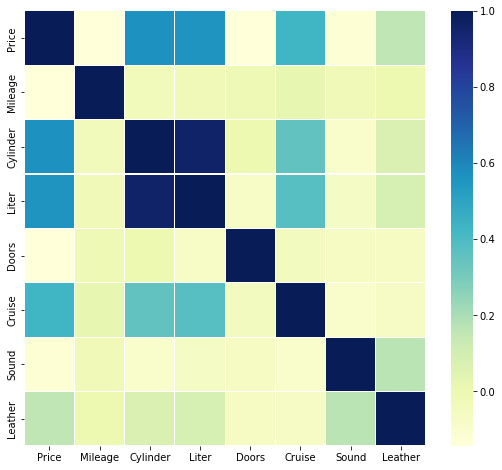

In [6]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [7]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
import statsmodels.api as sm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn
import sklearn.linear_model
import matplotlib
import sklearn.metrics

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,['Mileage']], df["Price"], test_size=0.3, random_state=42)

In [10]:
X_train.shape

(562, 1)

In [11]:
y_train.shape

(562,)

In [12]:
linear_regression_model = linear_model.LinearRegression(fit_intercept = True)

linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [13]:
linear_regression_model.coef_

array([-0.15275894])

In [14]:
linear_regression_model.intercept_

24415.28280468836

In [15]:
y_pred = linear_regression_model.predict(X_test)

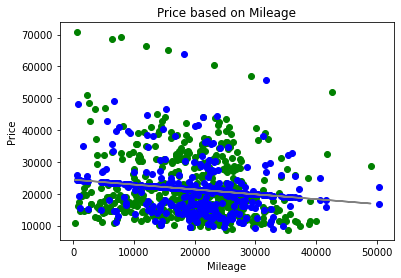

In [16]:
plt.scatter(X_train, y_train, color = 'green')
plt.scatter(X_test, y_test, color = 'blue')   
plt.scatter(X_test, y_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(X_train, linear_regression_model.predict(X_train), color = 'gray')
plt.title('Price based on Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [17]:
linear_regression_model.score(X_test, y_test)

0.03127867502687509

In [18]:
# The R square value is 0.03 which is very low

In [19]:
# Part2

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']], df["Price"], test_size=0.3, random_state=42)

In [21]:
X_train2

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
319,34815,4,2.2,4,0,1,1
132,13973,6,3.6,4,1,1,1
377,27460,6,3.8,4,1,1,1
571,2189,6,3.8,4,1,1,1
439,22889,6,3.5,4,0,1,1
...,...,...,...,...,...,...,...
71,9795,6,3.8,4,1,1,0
106,24415,8,4.6,4,1,1,1
270,4922,4,2.2,4,0,1,1
435,18721,6,3.5,4,0,1,1


In [22]:
linear_regression_model2 = linear_model.LinearRegression(fit_intercept = True)

linear_regression_model2.fit(X_train2,y_train2)

LinearRegression()

In [23]:
y_pred2 = linear_regression_model2.predict(X_test2)

In [24]:
linear_regression_model2.score(X_test2, y_test2)

0.417644418460011

In [25]:
# R squared value is 0.41 and it is very low

In [26]:
X_train2.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], dtype='object')

In [27]:
linear_regression_model2.coef_

array([-1.60627677e-01,  5.22161165e+03, -2.60764548e+03, -1.97678291e+03,
        6.46175759e+03, -1.90968522e+03,  3.23181293e+03])

In [28]:
# Based on the coefficients the factors that helps best to predict price are Cylinder, Cruise,Leather

In [29]:
# Make, Model and Type are all cateogrical variables - To encode them into numerical data we will use encoding technique One Hot Encoding

In [30]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Make','Model','Type'])
print(one_hot_encoded_data.head())

          Price  Mileage      Trim  Cylinder  Liter  Doors  Cruise  Sound  \
0  17314.103129     8221  Sedan 4D         6    3.1      4       1      1   
1  17542.036083     9135  Sedan 4D         6    3.1      4       1      1   
2  16218.847862    13196  Sedan 4D         6    3.1      4       1      1   
3  16336.913140    16342  Sedan 4D         6    3.1      4       1      0   
4  16339.170324    19832  Sedan 4D         6    3.1      4       1      0   

   Leather  Make_Buick  ...  Model_STS-V6  Model_STS-V8  Model_Sunfire  \
0        1           1  ...             0             0              0   
1        0           1  ...             0             0              0   
2        0           1  ...             0             0              0   
3        0           1  ...             0             0              0   
4        1           1  ...             0             0              0   

   Model_Vibe  Model_XLR-V8  Type_Convertible  Type_Coupe  Type_Hatchback  \
0           0  

In [31]:
one_hot_encoded_data.drop(['Trim'], inplace=True, axis=1)

In [32]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(one_hot_encoded_data.loc[:,:], one_hot_encoded_data["Price"], test_size=0.3, random_state=42)

In [33]:
X_train3

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
319,12741.190233,34815,4,2.2,4,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
132,38795.379095,13973,6,3.6,4,1,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
377,16508.590695,27460,6,3.8,4,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
571,19567.259291,2189,6,3.8,4,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
439,16027.286487,22889,6,3.5,4,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,26060.335350,9795,6,3.8,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
106,35866.582709,24415,8,4.6,4,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
270,14061.122765,4922,4,2.2,4,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
435,17173.942322,18721,6,3.5,4,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
linear_regression_model3 = linear_model.LinearRegression(fit_intercept = True)

linear_regression_model3.fit(X_train3,y_train3)

LinearRegression()

In [35]:
X_train3.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],
      dtype='object')

In [36]:
linear_regression_model3.coef_

array([ 1.00000000e+00, -6.08096439e-17, -1.63078712e-13,  5.83318188e-13,
        6.26404094e-14, -6.22230791e-14,  1.08200024e-13, -1.27478014e-14,
       -5.87210944e-15, -7.65708062e-13,  2.73540500e-13,  3.45469574e-14,
        5.92337163e-14,  4.04258998e-13, -2.55113761e-13,  2.61551169e-13,
        2.80312649e-13, -1.33280118e-13, -9.42362230e-14,  7.99395110e-13,
       -1.82042282e-13, -1.26214977e-12,  9.10864633e-13,  4.18759167e-13,
        5.35389436e-13,  3.00220396e-13,  9.32543897e-13, -1.43709067e-12,
        2.78294367e-13,  6.73600663e-14, -1.03908664e-12,  4.27387276e-13,
       -1.66068323e-13, -3.00237914e-13,  1.93934062e-13,  2.10324936e-13,
       -7.94940968e-14, -1.45434913e-13, -2.33953434e-13, -2.06096051e-13,
       -3.16332536e-13, -7.95385711e-13, -5.68295083e-14,  4.86083055e-13,
        4.40913801e-13,  1.59497927e-13, -8.02773557e-14,  4.89571510e-14,
       -2.83541672e-14, -5.99726916e-14,  1.19647063e-13])

In [37]:
# The most used features to be used for prediction Doors, Make_SAAB, Model_AVEO, Model_CTS, Model_Cobalt

In [39]:
linear_regression_model3.score(X_test3, y_test3)

1.0